* Take two hidden layers. The first hidden layer has 7 to 10 neurons and the second hidden layer has 5 to 7 neurons.
* Compute square error at the output layer.
* Perform backpropagation using stochastic gradient descent.
* Update weight vectors at each layer for two iterations

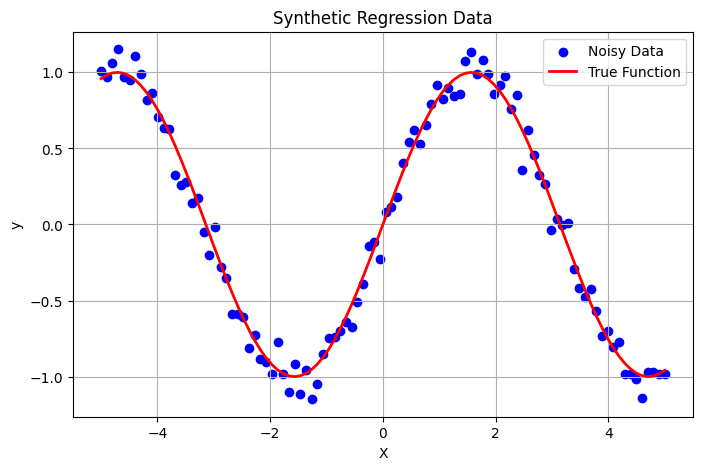

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic regression data
np.random.seed(42)
X = np.linspace(-5, 5, 100).reshape(-1, 1)
y = np.sin(X) + 0.1 * np.random.randn(100, 1)  # y = sin(X) with some noise

# Plot the data
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Noisy Data')  # Scatter plot
plt.plot(X, np.sin(X), color='red', linewidth=2, label='True Function')  # True sin(X)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Regression Data")
plt.legend()
plt.grid()
plt.show()


In [2]:
import numpy as np

# Activation function (Sigmoid) and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  
y = np.array([[0], [1], [1], [0]])  

# Initialize weight matrices with random values
np.random.seed(42)
input_dim = 2
hidden1_dim = np.random.randint(7, 11)  # 7 to 10 neurons in first hidden layer
hidden2_dim = np.random.randint(5, 8)   # 5 to 7 neurons in second hidden layer
output_dim = 1

W1 = np.random.uniform(-1, 1, (input_dim, hidden1_dim))
b1 = np.random.uniform(-1, 1, (1, hidden1_dim))
W2 = np.random.uniform(-1, 1, (hidden1_dim, hidden2_dim))
b2 = np.random.uniform(-1, 1, (1, hidden2_dim))
W3 = np.random.uniform(-1, 1, (hidden2_dim, output_dim))
b3 = np.random.uniform(-1, 1, (1, output_dim))

learning_rate = 0.1

# Training for two iterations using SGD
for epoch in range(2):
    for i in range(len(X)):
        # Forward pass
        x = X[i:i+1]  # Single data point (SGD)
        target = y[i:i+1]
        
        z1 = np.dot(x, W1) + b1
        a1 = sigmoid(z1)
        
        z2 = np.dot(a1, W2) + b2
        a2 = sigmoid(z2)
        
        z3 = np.dot(a2, W3) + b3
        output = sigmoid(z3)
        
        # Compute error (Squared Error)
        error = 0.5 * (target - output) ** 2
        
        # Backpropagation
        d_output = (output - target) * sigmoid_derivative(output)
        d_hidden2 = np.dot(d_output, W3.T) * sigmoid_derivative(a2)
        d_hidden1 = np.dot(d_hidden2, W2.T) * sigmoid_derivative(a1)
        
        # Update weights and biases
        W3 -= learning_rate * np.dot(a2.T, d_output)
        b3 -= learning_rate * d_output
        
        W2 -= learning_rate * np.dot(a1.T, d_hidden2)
        b2 -= learning_rate * d_hidden2
        
        W1 -= learning_rate * np.dot(x.T, d_hidden1)
        b1 -= learning_rate * d_hidden1
    
    print(f"Epoch {epoch + 1}, Error: {np.mean(error)}")


Epoch 1, Error: 0.22214414909460126
Epoch 2, Error: 0.21640084944968863


In [3]:
class NeuralNetwork:
    def __init__(self, X, y, X_test, y_test, alpha, epoch):
        self.X = X
        self.y = y
        self.X_test = X_test
        self.y_test = y_test
        self.lyr_nrn_cnt = [X.shape[1]]
        self.lyr_cnt = 0
        self.wts = []
        self.actn_vals = [X]
        self.y_pred = []
        self.alpha = alpha
        self.epoch = epoch
        self.bck_rcd = 0

    def build_layer(self, nrn_cnt, lyr_no):
        self.lyr_cnt = self.lyr_cnt + 1
        wt = np.random.uniform(0, 1, size=(self.lyr_nrn_cnt[-1], nrn_cnt))
        self.lyr_nrn_cnt.append(nrn_cnt)
        self.wts.append(wt)

    def sigmoid_fcn(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return z * (1 - z)

    def fwd_pass(self):
        for idx, wt in enumerate(self.wts):
            z = np.dot(self.actn_vals[idx], wt)
            actn_val = self.sigmoid_fcn(z)
            self.actn_vals.append(actn_val)
            print(f"Layer {idx+1} activation values: {actn_val}")
            print(f"Layer {idx+1} weights: {wt}")
        return self.actn_vals[-1]

    def gradient(self, loss, actn_val):
        return loss * self.sigmoid_derivative(actn_val)

    def bwd_pass(self):
        y_pred = self.fwd_pass()
        loss = self.MSE(y_pred)
        for j in reversed(range(len(self.wts))):
            actn_val = self.actn_vals[j+1]
            loss_grad = self.gradient(loss, actn_val)
            loss = np.dot(loss_grad, self.wts[j].T)
            print(f"Layer {j+1} gradients: {loss_grad}")
            self.wts[j] -= self.alpha * np.dot(self.actn_vals[j].T, loss_grad)

    def fit(self, X, y):
        for _ in range(self.epoch):
            self.actn_vals = [X]
            y_pred = self.fwd_pass()
            loss = self.MSE(y_pred)
            self.bwd_pass()
            print(f"Loss: {loss}")
            y_pred = self.predict(X_test)
            print(f"y_pred: {y_pred}")
            acc = self.calculate_accuracy(y_test, y_pred)
            print(f"Accuracy: {acc}")



    def predict(self, x):
        self.actn_vals = [x]
        return self.fwd_pass()

    def MSE(self, y_pred):
        return np.sum(np.square(y_pred - self.y)) / len(self.y)
    
    def calculate_accuracy(self, y_true, y_pred, tolerance=0.6):
        correct_predictions = np.abs(y_true - y_pred) <= tolerance
        accuracy = np.mean(correct_predictions)
        return accuracy

In [4]:
X = np.array([[1],[3],[2],[4]])
y = np.array([[0.4],[0.3],[0.4],[0.1]])
X_test = np.array([[1],[3],[2],[4]])
y_test = np.array([[0.4],[0.3],[0.4],[0.1]])

model = NeuralNetwork(X, y, X_test, y_test, 0.01, 2)
model.build_layer(8, 1)
model.build_layer(5, 2)
model.build_layer(2, 3)
model.fit(X, y)

y_pred = model.predict(X_test)

Layer 1 activation values: [[0.66124365 0.66058951 0.64366286 0.56825173 0.6367402  0.59457884
  0.72546062 0.70033924]
 [0.88148033 0.88056244 0.85494118 0.69511982 0.84339785 0.75928812
  0.94858963 0.9273543 ]
 [0.79210857 0.79114561 0.76541417 0.63400649 0.75444971 0.68262329
  0.87472784 0.8452508 ]
 [0.93555724 0.93484973 0.91413415 0.75005154 0.90421609 0.822256
  0.97990232 0.96756848]]
Layer 1 weights: [[0.66884125 0.66592236 0.59129779 0.27472179 0.56124343 0.38292687
  0.9717121  0.84891382]]
Layer 2 activation values: [[0.92723418 0.92099027 0.86253478 0.89143951 0.93839343]
 [0.96584961 0.95991098 0.91557403 0.94002396 0.97207561]
 [0.95371328 0.94623374 0.89731507 0.92286071 0.96128847]
 [0.97171223 0.96751815 0.92540905 0.94939069 0.97744746]]
Layer 2 weights: [[7.21729521e-01 2.35984920e-01 2.56068323e-01 4.04335895e-02
  7.10662890e-01]
 [1.10890821e-01 4.39336502e-01 2.01719202e-01 8.95763596e-01
  4.75370223e-01]
 [5.63275572e-01 6.95516086e-01 1.39331454e-01 6.04417

In [ ]:
import numpy as np

class NeuralNetwork:
    def __init__(self, X, y, X_test, y_test, alpha, epochs):
        self.X = X
        self.y = y
        self.X_test = X_test
        self.y_test = y_test
        self.alpha = alpha  
        self.epochs = epochs  
        
        self.layer_sizes = [X.shape[1]]  
        self.weights = []  
        self.biases = []  
        
    def build_layer(self, neuron_count):
        """ Adds a new layer to the neural network. """
        input_size = self.layer_sizes[-1]  
        self.layer_sizes.append(neuron_count)
        
        # Xavier Initialization for better convergence
        weight_matrix = np.random.randn(input_size, neuron_count) * np.sqrt(1 / input_size)
        bias_vector = np.zeros((1, neuron_count))
        
        self.weights.append(weight_matrix)
        self.biases.append(bias_vector)
        
        # Display initialized weights and biases
        print(f"Added Layer {len(self.layer_sizes)-1}: {input_size} → {neuron_count}")
        print(f"Weights shape: {weight_matrix.shape}")
        print(f"Biases shape: {bias_vector.shape}")
        print("-" * 50)


    def sigmoid(self, z):
        
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        
        return z * (1 - z)

    def forward_pass(self, X):
        
        activations = [X]
        for W, b in zip(self.weights, self.biases):
            X = self.sigmoid(np.dot(X, W) + b)
            activations.append(X)
        return activations

    def compute_loss(self, y_pred):
        
        return np.mean(np.square(y_pred - self.y))

    def backward_pass(self, activations):
        
        y_pred = activations[-1]
        error = y_pred - self.y 

        for i in reversed(range(len(self.weights))):
            grad = error * self.sigmoid_derivative(activations[i + 1])  
            error = np.dot(grad, self.weights[i].T)  

            # Update weights and biases
            self.weights[i] -= self.alpha * np.dot(activations[i].T, grad)
            self.biases[i] -= self.alpha * np.sum(grad, axis=0, keepdims=True)

    def fit(self):
        """ Trains the neural network. """
        for epoch in range(self.epochs):
            activations = self.forward_pass(self.X) 
            loss = self.compute_loss(activations[-1]) 
            self.backward_pass(activations)  

            print(f"Epoch {epoch+1}/{self.epochs}, Loss: {loss:.6f}")

    def predict(self, X):
        """ Predicts output for new data. """
        return self.forward_pass(X)[-1]  

    # def calculate_accuracy(self, y_true, y_pred, tolerance=0.1):
    #     """ Calculates accuracy based on a given tolerance. """
    #     correct_predictions = np.abs(y_true - y_pred) <= tolerance
    #     return np.mean(correct_predictions)



In [14]:
# ---------- TRAINING THE MODEL ---------- #

# Input and target data
X = np.array([[1], [3], [2], [4]])
y = np.array([[0.4], [0.3], [0.4], [0.1]])
X_test = np.array([[1], [3], [2], [4]])
y_test = np.array([[0.4], [0.3], [0.4], [0.1]])

# Initialize Neural Network
model = NeuralNetwork(X, y, X_test, y_test, alpha=0.01, epochs=500)

# Build layers
model.build_layer(8)  # Hidden layer with 8 neurons
model.build_layer(5)  # Hidden layer with 5 neurons
model.build_layer(1)  # Output layer with 1 neuron (since it's regression)

# Train the model
model.fit()

# Predictions
y_pred = model.predict(X_test)
print("\nPredictions:", y_pred.flatten())

# Accuracy
accuracy = model.calculate_accuracy(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Added Layer 1: 1 → 8
Weights shape: (1, 8)
Biases shape: (1, 8)
--------------------------------------------------
Added Layer 2: 8 → 5
Weights shape: (8, 5)
Biases shape: (1, 5)
--------------------------------------------------
Added Layer 3: 5 → 1
Weights shape: (5, 1)
Biases shape: (1, 1)
--------------------------------------------------
Epoch 1/500, Loss: 0.014579
Epoch 2/500, Loss: 0.014575
Epoch 3/500, Loss: 0.014572
Epoch 4/500, Loss: 0.014569
Epoch 5/500, Loss: 0.014566
Epoch 6/500, Loss: 0.014562
Epoch 7/500, Loss: 0.014559
Epoch 8/500, Loss: 0.014556
Epoch 9/500, Loss: 0.014553
Epoch 10/500, Loss: 0.014550
Epoch 11/500, Loss: 0.014547
Epoch 12/500, Loss: 0.014544
Epoch 13/500, Loss: 0.014541
Epoch 14/500, Loss: 0.014538
Epoch 15/500, Loss: 0.014535
Epoch 16/500, Loss: 0.014532
Epoch 17/500, Loss: 0.014529
Epoch 18/500, Loss: 0.014526
Epoch 19/500, Loss: 0.014523
Epoch 20/500, Loss: 0.014520
Epoch 21/500, Loss: 0.014517
Epoch 22/500, Loss: 0.014514
Epoch 23/500, Loss: 0.0145

In [7]:
import numpy as np

X = np.array([[1], [3], [2], [4]])
y = np.array([[0.4], [0.3], [0.4], [0.1]])
X_test = np.array([[1], [3], [2], [4]])
y_test = np.array([[0.4], [0.3], [0.4], [0.1]])

model = NeuralNetwork(X, y, X_test, y_test, 0.01, 2)
model.build_layer(8)  
model.build_layer(5)  
model.build_layer(2)  
model.fit()

y_pred = model.predict(X_test)
print("Predictions:", y_pred)


Added Layer 1: 1 → 8
Weights shape: (1, 8)
Biases shape: (1, 8)
--------------------------------------------------
Added Layer 2: 8 → 5
Weights shape: (8, 5)
Biases shape: (1, 5)
--------------------------------------------------
Added Layer 3: 5 → 2
Weights shape: (5, 2)
Biases shape: (1, 2)
--------------------------------------------------
Epoch 1/2, Loss: 0.021348
Epoch 2/2, Loss: 0.021282
Predictions: [[0.40341777 0.32534266]
 [0.41145389 0.32037426]
 [0.40955326 0.32309927]
 [0.41203013 0.31895759]]
